In [1]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('salju_train2.csv')
data.head()

id     Tanggal KodeLokasi  SuhuMin  SuhuMax  Hujan  Penguapan  \
0   4    8/8/2012        C36      7.3     24.5    0.0        8.4   
1   5  10/29/2016         C7      5.9     20.3    0.0        3.6   
2   6   6/12/2011        C12     14.4     21.8    0.0        3.2   
3   7   6/13/2009        C36      7.7     18.7    0.2        5.6   
4   9   2/18/2014         C8     18.4     35.3    0.0       10.0   

   SinarMatahari ArahAnginTerkencang  KecepatanAnginTerkencang  ...  \
0           10.4                 SSW                        54  ...   
1           12.6                   N                        37  ...   
2            4.4                  SW                        39  ...   
3            9.7                 WNW                        46  ...   
4           12.5                 ENE                        33  ...   

  Kelembaban9am Kelembaban3pm  Tekanan9am  Tekanan3pm  Awan9am  Awan3pm  \
0            25            17      1019.2      1016.9        1        7   
1            55            48      1019.7      1014.7        2        6   
2            63            52      1016.1      1012.5        7        7   
3            69            31      1011.3      1008.8        1        1   
4            44            18      1017.9      1013.4        0        0   

   Suhu9am  Suhu3pm  BersaljuHariIni  BersaljuBesok  
0     15.3     23.2            Tidak          Tidak  
1     12.4     18.1            Tidak          Tidak  
2     16.7     21.1            Tidak          Tidak  
3     11.3     18.3            Tidak          Tidak  
4     23.7     34.9            Tidak          Tidak  

[5 rows x 24 columns]

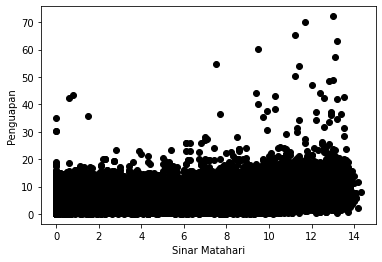

In [3]:
X = data[["Penguapan","SinarMatahari"]] #ubah VARIABLE disini untuk mengganti hal yang ingin di teliti
plt.scatter(X["SinarMatahari"],X["Penguapan"],c='black')
plt.xlabel('Sinar Matahari')
plt.ylabel('Penguapan')
plt.show()

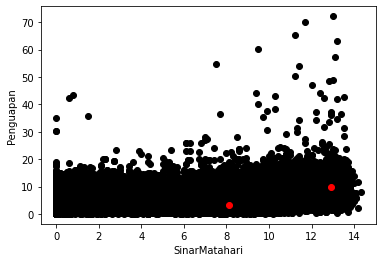

In [15]:
#Kita menentukan jumlah cluster(K) dan letak centroid secara random
#ubah k disini jika ingin melakukan eksperimen
K=2

# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.scatter(X["SinarMatahari"],X["Penguapan"],c='black')
plt.scatter(Centroids["SinarMatahari"],Centroids["Penguapan"],c='red')
#disini centroid ditandai dengan dot berwarna merah
plt.xlabel('SinarMatahari')
plt.ylabel('Penguapan')
plt.show()

In [16]:
#disini program melakukan perulangan secara terus menerus, data (points) di assign ke centroid terdekat dan menghitung ulang centroid dari cluster yang baru dibentuk
jarak = 1
j=0

while(jarak!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["SinarMatahari"]-row_d["SinarMatahari"])**2
            d2=(row_c["Penguapan"]-row_d["Penguapan"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["Penguapan","SinarMatahari"]]
    if j == 0:
        jarak=1
        j=j+1
    else:
        jarak = (Centroids_new['Penguapan'] - Centroids['Penguapan']).sum() + (Centroids_new['SinarMatahari'] - Centroids['SinarMatahari']).sum()
        print(jarak.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["Penguapan","SinarMatahari"]]

-1.5441416002557253
-1.0756416139747786
-0.7196229176398883
-0.5588121824821362
-0.41995139937670656
-0.3131308372102857
-0.23440832035014125
-0.1662031937065951
-0.12381035261064932
-0.10526235545556295
-0.06816944014448856
-0.054295261039418286
-0.043724282343964305
-0.04046211013243317
-0.034870575905374235
-0.0262081209172087
-0.03339581480883114
-0.018185028349902765
-0.015676614280703216
-0.012859446464926094
-0.010049255794317702
-0.0055411052737190936
-0.00045162716158664296
-0.003693376116389757
-0.001359457746963777
0.0


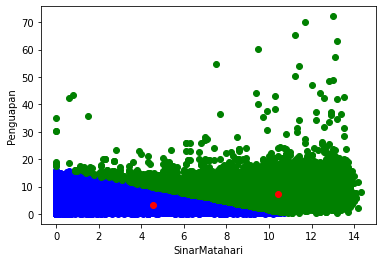

In [17]:
color=['blue','green']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["SinarMatahari"],data["Penguapan"],c=color[k])
plt.scatter(Centroids["SinarMatahari"],Centroids["Penguapan"],c='red')
plt.xlabel('SinarMatahari')
plt.ylabel('Penguapan')
plt.show()